In [6]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Github\VarianceArithmetic\IPyNb


In [8]:
df = pd.read_csv("../Python/Output/RegrSin_18.txt", sep='\t')
df.head()

,Order,Index,Quart Value,Quart Uncertainty,Regr Value,Regr Uncertainty,Regr Error,Regr Normalized
0,0,0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000
1,0,131072,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,0.000000
2,1,65536,0.707107,6.409876e-17,0.707107,6.409876e-17,0.000000e+00,0.000000
3,2,32768,0.382683,3.204938e-17,0.382683,5.273151e-17,-5.551115e-17,-1.052713
4,2,98304,0.923880,6.409876e-17,0.923880,6.640403e-17,0.000000e+00,0.000000


In [9]:
df = df.sort_values('Index')
df['Order'].unique()

array([ 0, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1], dtype=int64)

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Uncertainty'>

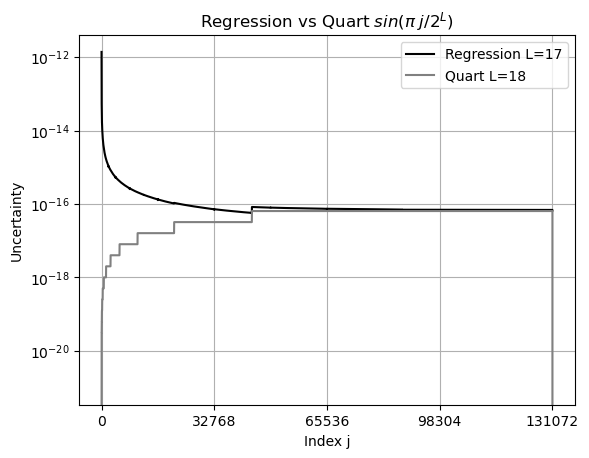

In [10]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Uncertainty',  c='black', ls='-', label='Regression L=17')
df.plot(ax = ax, x='Index', y='Quart Uncertainty', c='gray', ls='-', label='Quart L=18',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Uncertainty', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

In [42]:
df = pd.read_csv("../Python/Output/RegrSin_18.err.txt", sep='\t')
df.head()

,Order,Sin Index,Cos Index,Regr Error,Regr Uncertainty,Regr Normalized,Quart Error,Quart Uncertainty,Quart Normalized
0,0,0,131072,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN
1,1,65536,65536,2.220446e-16,1.570084e-16,1.414221,2.220446e-16,2.398340e-16,0.925826
2,2,32768,98304,0.000000e+00,1.450827e-16,0.000000,0.000000e+00,2.196663e-16,0.000000
3,3,16384,114688,0.000000e+00,1.489205e-16,0.000000,0.000000e+00,2.273071e-16,0.000000
4,4,8192,122880,0.000000e+00,1.502867e-16,0.000000,0.000000e+00,2.301009e-16,0.000000


In [43]:
dfMean = df[['Order', 'Regr Error', 'Quart Error', 'Regr Uncertainty', 'Quart Uncertainty', 
             'Regr Normalized', 'Quart Normalized']].groupby('Order').mean()
dfMax = df[['Order', 'Regr Error', 'Quart Error', 'Regr Uncertainty', 'Quart Uncertainty', 
            'Regr Normalized', 'Quart Normalized']].groupby('Order').max()
dfStd = df[['Order', 'Regr Error', 'Quart Error', 'Regr Uncertainty', 'Quart Uncertainty', 
            'Regr Normalized', 'Quart Normalized']].groupby('Order').std()

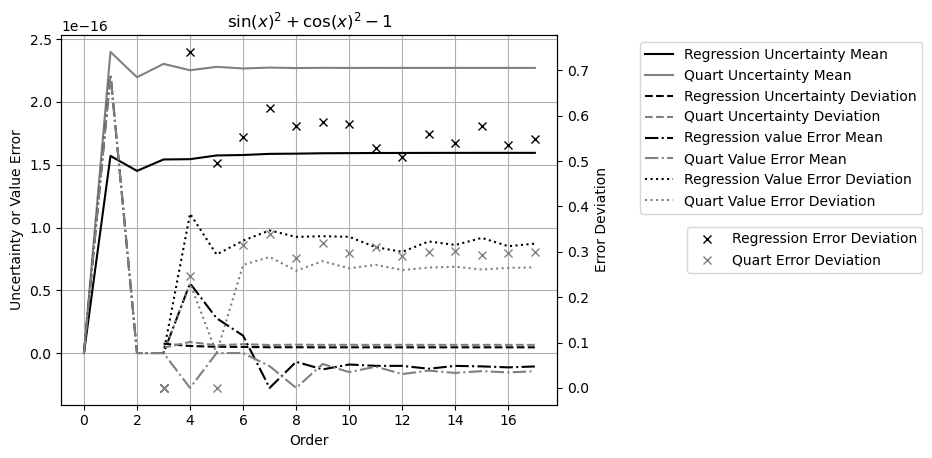

In [44]:
ax = dfMean.plot(y='Regr Uncertainty', c='black', ls='-', label='Regression Uncertainty Mean')
dfMean.plot(ax=ax, y='Quart Uncertainty', c='gray', ls='-', label='Quart Uncertainty Mean')
dfStd.plot(ax=ax, y='Regr Uncertainty', c='black', ls='--', label='Regression Uncertainty Deviation')
dfStd.plot(ax=ax, y='Quart Uncertainty', c='gray', ls='--', label='Quart Uncertainty Deviation')
dfMean.plot(ax=ax, y='Regr Error', c='black', ls='-.', label='Regression value Error Mean')
dfMean.plot(ax=ax, y='Quart Error', c='gray', ls='-.', label='Quart Value Error Mean')
dfStd.plot(ax=ax, y='Regr Error', c='black', ls=':', label='Regression Value Error Deviation')
dfStd.plot(ax=ax, y='Quart Error', c='gray', ls=':', label='Quart Value Error Deviation',
           grid=True, xticks=range(0, 18, 2), ylabel='Uncertainty or Value Error',
           title=r'$\sin(x)^2 + \cos(x)^2 - 1$')
ax.legend(bbox_to_anchor=(1.75, 1.0))

ax2 = ax.twinx()
dfStd.plot(ax=ax2, y='Regr Normalized', c='black', ls='', marker='x', label='Regression Error Deviation')
dfStd.plot(ax=ax2, y='Quart Normalized', c='gray', ls='', marker='x', label='Quart Error Deviation')
ax2.set_ylabel('Error Deviation')
ax2.legend(bbox_to_anchor=(1.75, 0.5))

In [17]:
df['Regr Precision'] = df['Regr Uncertainty'] / df['Quart Value']
df['Quart Precision'] = df['Quart Uncertainty'] / df['Quart Value']

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Precision'>

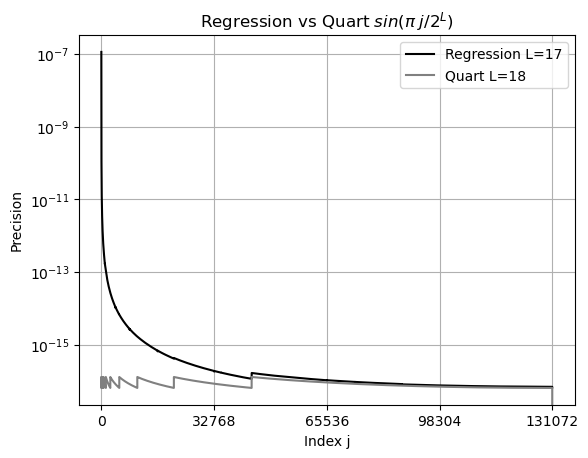

In [18]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Precision',  c='black', ls='-', label='Regression L=17')
df.plot(ax = ax, x='Index', y='Quart Precision', c='gray', ls='-', label='Quart L=18',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Precision', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

<AxesSubplot:title={'center':'Regression vs Quart $sin(\\pi\\; j/2^L)$'}, xlabel='Index j', ylabel='Precision or Uncertainty'>

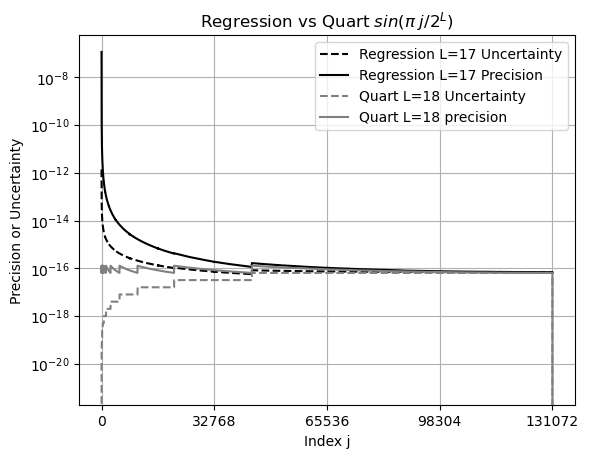

In [24]:
ax = df[df['Order'] == 17].plot(x='Index', y='Regr Uncertainty', c='black', ls='--', label='Regression L=17 Uncertainty')
df[df['Order'] == 17].plot(ax=ax, x='Index', y='Regr Precision', c='black', ls='-', label='Regression L=17 Precision') 
df.plot(ax = ax, x='Index', y='Quart Uncertainty', c='gray', ls='--', label='Quart L=18 Uncertainty')
df.plot(ax = ax, x='Index', y='Quart Precision', c='gray', ls='-', label='Quart L=18 precision',
        logy=True, grid=True, xlabel="Index j", ylabel = 'Precision or Uncertainty', xticks = range(0, 2**17 + 1, 2**15),
        title=r'Regression vs Quart $sin(\pi\; j/2^L)$')

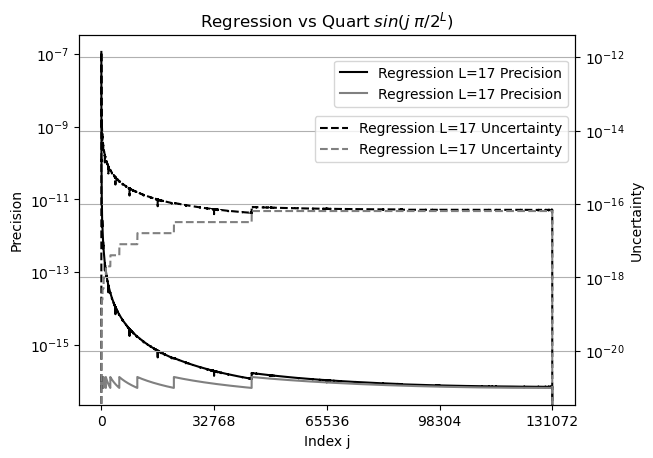

In [38]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.plot(df['Index'], df['Regr Precision'], c='black', ls='-', label='Regression L=17 Precision')
ax.plot(df['Index'], df['Quart Precision'], c='gray', ls='-', label='Regression L=17 Precision')
ax.set_xlabel('Index j')
ax.set_ylabel('Precision')
ax.set_title(r'Regression vs Quart $sin(j\; \pi/2^L)$')
ax.set_xticks(range(0, 2**17 + 1, 2**15))

ax2 = ax.twinx()
ax2.set_yscale('log')
ax2.plot(df['Index'], df['Regr Uncertainty'], c='black', ls='--', label='Regression L=17 Uncertainty')
ax2.plot(df['Index'], df['Quart Uncertainty'], c='gray', ls='--', label='Regression L=17 Uncertainty')
ax2.set_ylabel('Uncertainty')

plt.grid(True)
ax.legend(bbox_to_anchor=(1, 0.95))
ax2.legend(bbox_to_anchor=(1, 0.8))